In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
N = 101           # число ячеек
L = 1            
a = 0            # точка разрыва
T_max = 0.3      # время

x = np.linspace(-L, L, N) #область
h = x[1] - x[0]
tau = h/5      #должно быть tau/h < 1/max(u)
print (x, h)

steps = int(T_max / tau)+1   # Шаг по времени
print ("n_steps=", steps)

#метод Годунова для Хопфа
def godunov_flux(uL, uR):  
    if uL > uR:
        #Ударная волна
        s = (uL + uR) / 2  # Скорость УВ
        return uL**2 / 2 if s >= 0 else uR**2 / 2
    else:
        # Волна разрежения
        if 0 <= uL and uL<=uR:
            return uL**2 / 2
        elif 0 >= uR and uL<=uR:
            return uR**2 / 2
        elif uL<0<uR:
            return 0

#аналитическое решение
def analit_solve(uL, uR):
    u_a=np.zeros(N)
    s = (uL + uR) / 2
    for i in range (N):
        if uL>=uR: 
            u_a[i]= uL if x[i]<=s*T_max else uR
        else:
            if x[i]<=uL*T_max:  u_a[i]= uL  
            elif uL*T_max<x[i]<=uR*T_max : u_a[i] = x[i]/T_max 
            else : u_a[i]= uR
    return u_a

def solve_case(uL, uR, title):
    u = [np.zeros(N) for i in range (steps+1)] 
    # print(u)
    for i in range(N):
        u[0][i] = uL if x[i] < a else uR
    # print (u)


    
    for n in range(steps):
        #поток
        F = np.zeros(N+1)
        for i in range(N-1):
            F[i+1] = godunov_flux(u[n][i], u[n][i+1])
        # Граничные условия
        F[0] = godunov_flux(u[n][0], u[n][0])
        F[-1] = godunov_flux(u[n][-1], u[n][-1])

        for i in range(N):
            u[n+1][i] = u[n][i] - tau/h * (F[i+1] - F[i])
        # print (u)

    u_a = analit_solve(uL, uR)

    plt.figure(figsize=(10, 6))
    plt.imshow(u, aspect='auto', cmap='hot', origin='lower')
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, [u[steps][i] for i in range (N)], label="Numerical solution", color='blue')
    plt.plot(x, u_a, label="Analytical solution", color='r', linewidth=1, linestyle= ':')
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("u(x, T_max)")
    plt.grid(True)
    plt.legend()
    plt.show()



[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82 -0.8  -0.78
 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58 -0.56 -0.54
 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3
 -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06
 -0.04 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18
  0.2   0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42
  0.44  0.46  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66
  0.68  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9
  0.92  0.94  0.96  0.98  1.  ] 0.020000000000000018
n_steps= 75


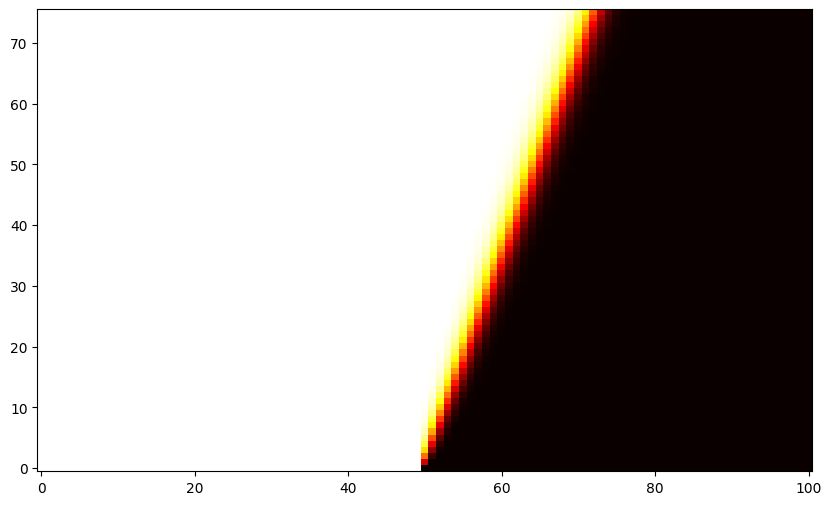

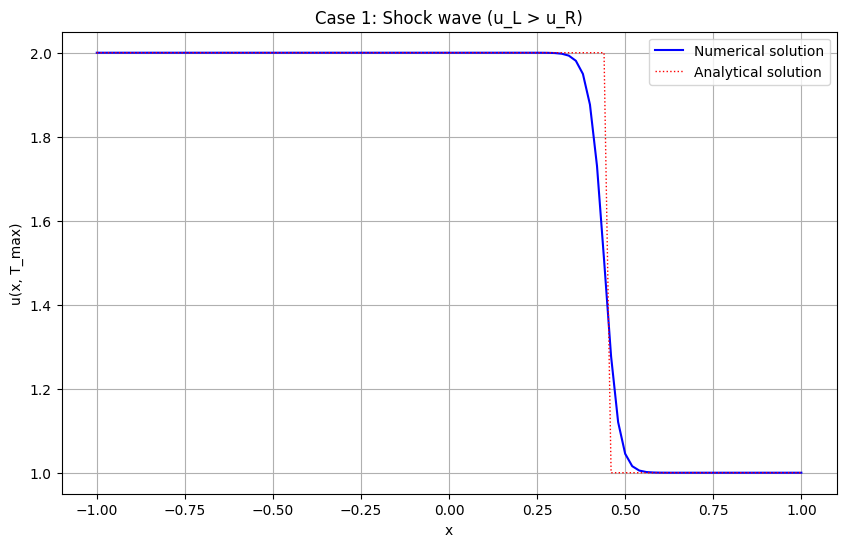

In [83]:
# Тестовые случаи
solve_case(
    uL=2,
    uR=1,
    title="Case 1: Shock wave (u_L > u_R)"
)


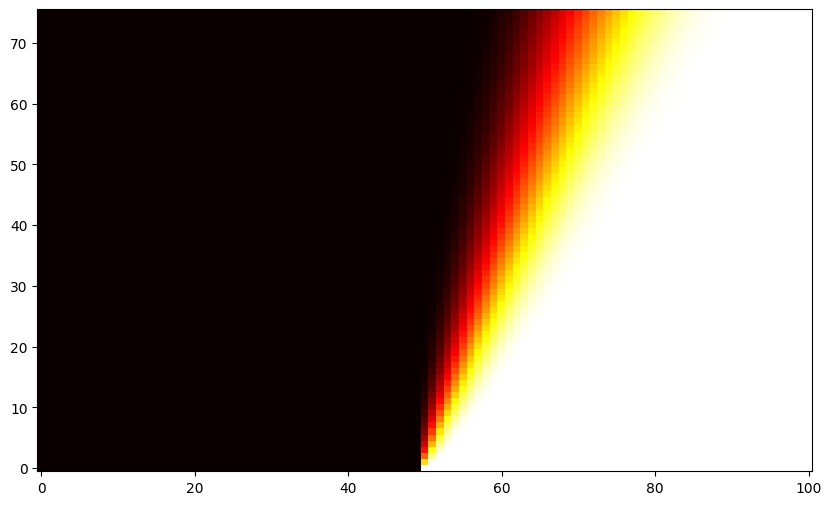

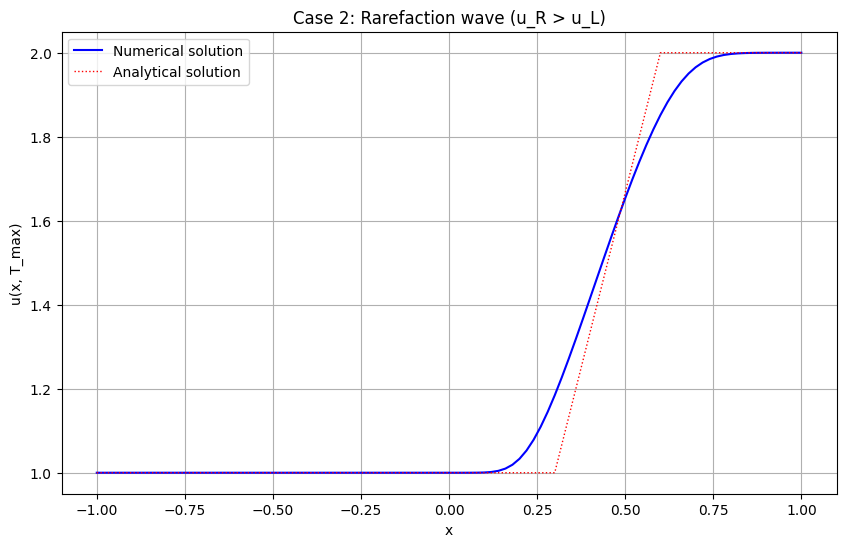

In [84]:
solve_case(
    uL=1,
    uR=2,
    title="Case 2: Rarefaction wave (u_R > u_L)"
)